<a href="https://colab.research.google.com/github/nirkoren1/Chord_Transformer/blob/master/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.9 MB/s 


In [ ]:
import tensorflow as tf
import pickle5
import pickle
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, LayerNormalization, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
path_to_dictionary = r"/content/drive/MyDrive/Colab Notebooks/tokens.pickle"
with open(path_to_dictionary, "rb") as f:
  dictionary = pickle.load(f)
dictionary

{'Gb7/55': 0,
 'G4': 1,
 'Ebm7': 2,
 'Ab6/44': 3,
 'trip hop': 4,
 'intelligent dance music': 5,
 'speed metal': 6,
 'kayokyoku': 7,
 'geek rock': 8,
 'south carolina hip hop': 9,
 'stockholm indie': 10,
 'D/Bb': 11,
 'Bbm/Db': 12,
 'french romanticism': 13,
 'G5/F#': 14,
 'chicago hardcore': 15,
 'D#4/77': 16,
 'F6/1111': 17,
 'uk dnb': 18,
 'vallenato moderno': 19,
 'new orleans rap': 20,
 'north carolina roots': 21,
 'Am7/F': 22,
 'Dm9/F': 23,
 'Bm/44': 24,
 'alternative emo': 25,
 'Am/F': 26,
 'turkish psych': 27,
 'música pitiusa': 28,
 'french opera': 29,
 'C/Ab': 30,
 'irish indie': 31,
 'regional mexican': 32,
 'Am7/1111': 33,
 'bmore': 34,
 'Ab6': 35,
 'mestissatge': 36,
 'Ab6/Eb': 37,
 'Bb/Db': 38,
 'modern indie pop': 39,
 'D#5/A': 40,
 'classify': 41,
 'turkish alternative rock': 42,
 'G#m/55': 43,
 'new weird america': 44,
 'mexican pop punk': 45,
 'southern hip hop': 46,
 'children': 47,
 'traditional folk': 48,
 'F#7/66': 49,
 'moldovan pop': 50,
 'nasyid': 51,
 'midwest

In [ ]:
path_to_data = r"/content/drive/MyDrive/Colab Notebooks/data.pickle"
with open(path_to_data, "rb") as f:
  data = pickle5.load(f)
data

,genres,popularity,chords,training_data
0,"[canadian pop, pop, post-teen pop]",100,"[G, G/B, B, C, G, G, G/B, B, C, G, G, Em, C, G...","[<start-genres>, canadian pop, pop, post-teen ..."
1,"[canadian pop, pop, post-teen pop]",100,"[F#m7, D2, F#m7, D2, F#m7, D2, E, F#m7, A/C#, ...","[<start-genres>, canadian pop, pop, post-teen ..."
2,"[canadian pop, pop, post-teen pop]",100,"[Em, D, C, C, D, Em, Em, D, C, C, D, Em, Em, D...","[<start-genres>, canadian pop, pop, post-teen ..."
3,"[canadian pop, pop, post-teen pop]",100,"[Em, Bm, Am, C, Em, Bm, Am, C, Em, Bm, Am, C, ...","[<start-genres>, canadian pop, pop, post-teen ..."
4,"[canadian pop, pop, post-teen pop]",100,"[Gm, Dm, C, C, Gm, Dm, C, C, Gm, Dm, C, C, Gm,...","[<start-genres>, canadian pop, pop, post-teen ..."
...,...,...,...,...
135777,"[classic rock, folk, folk rock, melancholia, m...",76,"[C, Am, F, G, C, Am, F, G, C, Am, F, G, C, Am,...","[<start-genres>, classic rock, folk, folk rock..."
135778,"[classic rock, folk, folk rock, melancholia, m...",76,"[B, E, B, E, B, E, F#, E, B, F#, E, B, E, B, E...","[<start-genres>, classic rock, folk, folk rock..."
135780,"[classic rock, folk, folk rock, melancholia, m...",76,"[Dm, C, Dm, F, Bb, F, Bb, F, Bb, F, Dm, F, C, ...","[<start-genres>, classic rock, folk, folk rock..."
135781,"[classic rock, folk, folk rock, melancholia, m...",76,"[G, Em, C, G, G, Am, C, D, G, Em, C, G, G, Am,...","[<start-genres>, classic rock, folk, folk rock..."


In [ ]:
def tokenize(batch):
  out = []
  for sample in batch:
    ids = []
    for token in sample:
      ids.append(dictionary[token])
    out.append(ids)
  max_length = max([len(sample) for sample in batch])
  for sample in out:
    while len(sample) < max_length:
      sample.append(0)
  return tf.convert_to_tensor(out, dtype=tf.int32)

example = [data["training_data"][0], ["<start>", "<end>"]]
print(example)
example_toknized = tokenize(example)
print(example_toknized[0])
print(example_toknized[1])

[['<start-genres>', 'canadian pop', 'pop', 'post-teen pop', '<start>', 'G', 'G/B', 'B', 'C', 'G', 'G', 'G/B', 'B', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'G/B', 'B', 'C', 'G', 'G', 'G/B', 'B', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'B', 'Bm', 'C', 'Bm', 'C', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'G', 'G', 'Em', 'C', 'C', 'G', 'G', 'G', 'Em', 'C', 'G', '<end>'], ['<start>', '<end>']]
tf.Tensor(
[3688 2664 3683 1016 1823  769 3514 3299 3014  769  769 3514 3299 3014
  769  769 1604 3014  769  769 1604 3014  769  769 1604 3014  769  769
 1604 3014  769  769 1604 3014  769  769 1604 3014  769  769 1604 3014
  769  769 3514 3299 3014  769  769 3514 3299

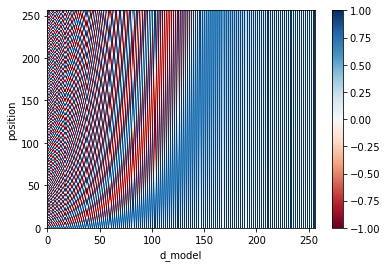

In [ ]:
d_model = 256
max_sample_size = 256
def position_encoding(pos, i, embedding_size):
    if i % 2 == 0:
        return np.sin(pos / (10000 ** (2 * (i // 2) / embedding_size)))
    return np.cos(pos / (10000 ** (2 * (i // 2) / embedding_size)))
positional_matrix = tf.convert_to_tensor([[position_encoding(i, j, d_model) for j in range(d_model)] for i in range(max_sample_size)], dtype=tf.float32)
plt.pcolormesh(positional_matrix, cmap='RdBu')
plt.ylabel('position')
plt.xlabel('d_model')
plt.colorbar()
plt.show()

In [ ]:
def add_positional_embedding(batch):
  postion_embedding_sliced = positional_matrix[:batch.shape[-2], :batch.shape[-1]]
  out = []
  for sample in batch:
    out.append(tf.add(sample, postion_embedding_sliced))
  return tf.convert_to_tensor(out)
example = [[0, 0, 0, 0],
           [0, 0, 0, 0]]
example = tf.convert_to_tensor([example], dtype=tf.float32)
add_positional_embedding(example)

<tf.Tensor: shape=(1, 2, 4), dtype=float32, numpy=
array([[[0.        , 1.        , 0.        , 1.        ],
        [0.84147096, 0.569695  , 0.8019618 , 0.62342006]]], dtype=float32)>

In [ ]:
def look_ahead_mask(batch):
  mask = [[[0. if i >= j else 1 for j in range(batch.shape[2])] for i in range(batch.shape[1])] for k in range(batch.shape[0])]
  mask = tf.convert_to_tensor(mask, dtype=tf.float32)
  return mask[:, :, :batch.shape[1]:]

def padding_mask(batch):
  mask = tf.cast(tf.math.equal(batch, 0), tf.float32)
  return mask[:, :, :batch.shape[1]:]

look_ahead_mask(example)
padding_mask(example)

<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[0., 0.],
        [0., 0.]]], dtype=float32)>

In [ ]:
def attention_head(q, k, v, dk, mask):
  QK = tf.linalg.matmul(q, k, transpose_b=True)
  QK = tf.scalar_mul(1 / np.sqrt(dk), QK)
  QK += mask * -1e9
  QK = tf.nn.softmax(QK, axis=-1)
  QKV = tf.linalg.matmul(QK, v)
  return QKV

example = [[[0.1, 0.2, 0.1],
            [0.3, 0.2, 0],
            [0, 0, 0]]]
example = tf.convert_to_tensor(example, dtype=tf.float32)
attention_head(example, example, example, 256 / 8, padding_mask(example))

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[0.1339022 , 0.13384306, 0.03343119],
        [0.20053032, 0.2       , 0.04973484],
        [0.13333334, 0.13333334, 0.03333334]]], dtype=float32)>

In [ ]:
class MultiHeadAttention(keras.layers.Layer):
  def __init__(self, d_model, h: int, dropout_rate=0.1):
    super(MultiHeadAttention, self).__init__()
    self.h = h
    self.d_model = d_model
    self.dk = d_model / h
    self.normalize = LayerNormalization(axis=-1, center=True, scale=True, epsilon=0.0001)
    self.fc = Dense(d_model)
    self.dropout = Dropout(dropout_rate)
    self.value_weights = [Dense(self.dk) for _ in range(h)]
    self.query_weights = [Dense(self.dk) for _ in range(h)]
    self.key_weights = [Dense(self.dk) for _ in range(h)]

  def call(self, q, k, v, mask, training=False):
    query = tf.split(q, self.h, axis=-1)
    key = tf.split(k, self.h, axis=-1)
    value = tf.split(v, self.h, axis=-1)
    query_processed = [self.query_weights[i](query[i]) for i in range(self.h)]
    key_processed = [self.key_weights[i](key[i]) for i in range(self.h)]
    value_processed = [self.value_weights[i](value[i]) for i in range(self.h)]
    attentions = [attention_head(query_processed[i], key_processed[i], value_processed[i], self.dk, mask) for i in range(self.h)]
    result = tf.concat(attentions, -1)
    result = self.fc(result)
    if training:
      result = self.dropout(result)
    result = self.normalize(result)
    return result
    
mha_example = MultiHeadAttention(d_model, 8)
tensor_example = tf.convert_to_tensor([[[np.random.random() for j in range(d_model)] for k in range(90)] for i in range(8)])
mha_example(tensor_example, tensor_example, tensor_example, look_ahead_mask(tensor_example))

<tf.Tensor: shape=(8, 90, 256), dtype=float32, numpy=
array([[[ 0.11465915,  0.73172593,  0.53842324, ...,  1.260411  ,
         -0.01191268,  1.7104696 ],
        [ 0.32757947,  1.2392418 , -0.07714794, ...,  0.6988587 ,
         -0.39576074,  0.5177754 ],
        [ 0.2939965 ,  1.1808063 ,  0.242888  , ...,  0.9505269 ,
         -0.45347205,  0.6474446 ],
        ...,
        [ 0.39377245,  1.121342  ,  0.21586072, ...,  1.4654816 ,
         -0.3744854 ,  0.5052195 ],
        [ 0.3914372 ,  1.0926979 ,  0.20272636, ...,  1.449058  ,
         -0.37791815,  0.49243516],
        [ 0.39466003,  1.0974928 ,  0.23230381, ...,  1.457464  ,
         -0.36318514,  0.5018224 ]],

       [[ 0.6993709 ,  1.8473016 ,  0.17109133, ...,  1.4919128 ,
         -1.2331494 ,  0.5468203 ],
        [ 0.6852408 ,  1.4076943 ,  0.47876605, ...,  0.9807687 ,
         -0.58778673,  0.20770493],
        [ 0.45697308,  0.87639767,  0.06525892, ...,  1.4465457 ,
         -0.35288748,  0.28309104],
        ...,


In [ ]:
class FeedForwardBlock(keras.layers.Layer):
  def __init__(self, d_model, hidden_layer_size, dropout_rate=0.1):
    super(FeedForwardBlock, self).__init__()
    self.fc1 = Dense(hidden_layer_size, activation="relu")
    self.fc2 = Dense(d_model)
    self.normalize = LayerNormalization(axis=-1, center=True, scale=True, epsilon=0.0001)
    self.dropout = Dropout(dropout_rate)

  def call(self, input_tensor, training=False):
    result = self.fc1(input_tensor)
    result = self.fc2(result)
    if training:
      result = self.dropout(result)
    return result

ff_example = FeedForwardBlock(d_model, d_model * 4)
ff_example(tensor_example, True)

<tf.Tensor: shape=(8, 90, 256), dtype=float32, numpy=
array([[[ 0.01709209, -0.        , -0.58655083, ...,  0.        ,
         -0.21768665, -0.86175364],
        [ 0.25737768, -0.11384337, -0.43689448, ...,  0.45587555,
         -0.19305597, -0.98167807],
        [ 0.12427789, -0.18122695, -0.59299564, ...,  0.34904534,
         -0.07591632, -1.2242204 ],
        ...,
        [ 0.13772067, -0.0682608 , -0.43767288, ...,  0.        ,
         -0.08120117, -1.0935974 ],
        [-0.12701882, -0.32791203, -0.35132003, ...,  0.20044887,
         -0.16095902, -1.0801767 ],
        [-0.18864296, -0.16214044, -0.23641445, ...,  0.40071273,
         -0.3778838 , -1.0827534 ]],

       [[-0.03853332, -0.22785932, -0.        , ...,  0.23147742,
         -0.24306798, -0.88251954],
        [ 0.29850298, -0.33748576, -0.        , ...,  0.15670775,
         -0.35550323, -0.7692647 ],
        [ 0.3428368 , -0.08358917, -0.17826203, ...,  0.3963668 ,
         -0.4464044 , -0.9675273 ],
        ...,


In [ ]:
class Encoder(keras.layers.Layer):
  def __init__(self, d_model, h, encoder_dict_size, N=6):
    super().__init__()
    self.N = N
    self.d_model = d_model
    self.h = h
    self.embedding
    self.embedding = Embedding(encoder_dict_size, d_model, mask_zero=True)

  def call(self, encoder_input, mask, training=False):
    pass